# AI Master: Basic Class
## Hands-On
Dibuat dan dipaparkan oleh:

<img src="https://ailo.telkomuniversity.ac.id/wp-content/uploads/2023/07/cropped-logo-stempel-ai-center-1.png" width="250px"/>

© 2023 AI for Learning & Optimization Telkom University

[Instagram](https://www.instagram.com/aicenter.telu)
<br/>

### IMPORT DEPENDENCIES

Pada langkah ini melakukan import (sekaligus install jika tidak menggunakan Google Colab) pada library-library yang dibutuhkan. Kebutuhannya ada Tensorflow (framework) dan matplotlib (plotting grafik dan gambar).

In [1]:
# DO NOT CHANGE THIS CODE

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### DATA PREPROCESSING

Pada langkah ini dilakukan pengambilan data dari koleksi dataset Tensorflow. Dataset yang digunakan adalah [Cifar10](https://www.cs.toronto.edu/~kriz/cifar.html). Cifar10 adalah dataset berisi 50.000 32x32 color training images and 10.000 test images, dengan 10 kategori berbeda. Setelah dataset di load, data akan dicek spesifikasinya sebelum diberikan ke model.

In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # DO NOT CHANGE THIS CODE

# Normalisasi nilai pixel sehingga berada pada range 0 sampai 1
# HINT: Nilai awal setiap pixel memiliki rentang 0-255

train_images, test_images = train_images, test_images / 255.0 # FILL WITH YOUR CODE HERE
#train_images = train_images / 255.0
#test_images = test_images / 255.0

#### Menampilkan isi dari dataset

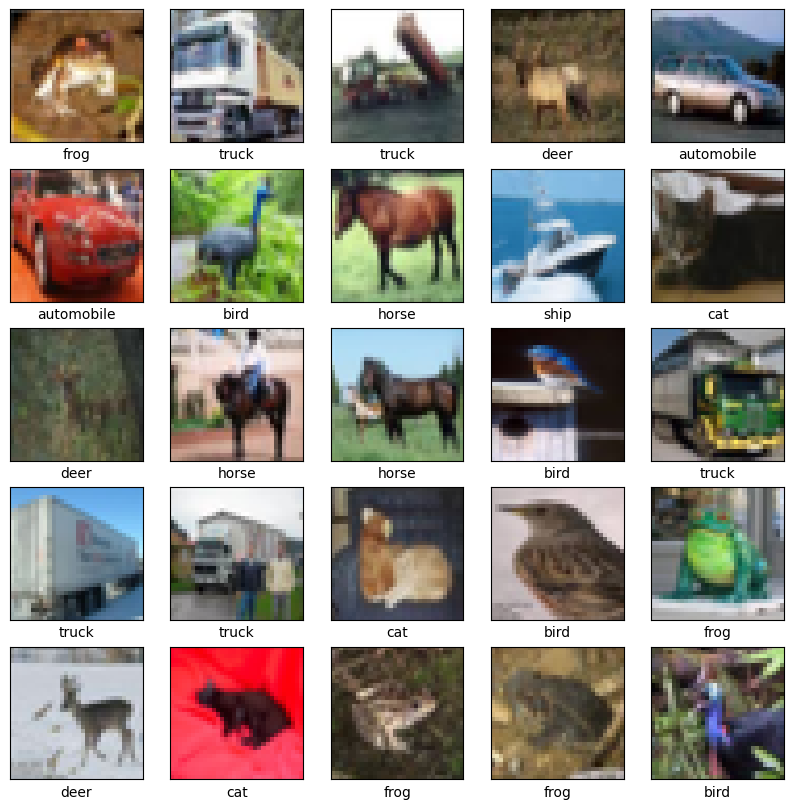

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [22]:
#Mencetak Ukuran array Set Pelatihan
print("Ukuran data Gambar Latih:"+str(train_images.shape))
#Menceetak Ukuran array Label
print("Ukuran data Label Latih:"+str(train_labels.shape))

#Cetak Ukuran array Set Uji
print("Ukuran data Gambar Uji :"+str(test_images.shape))
#Cetak Ukuran array Label
print("Ukuran data Label Uji :"+str(test_labels.shape))

#Mencetak output
print("Kumpulan Label Latih :"+str(train_labels))
print("Kumpulan Label Uji  :"+str(test_labels))

Ukuran data Gambar Latih:(50000, 32, 32, 3)
Ukuran data Label Latih:(50000, 1)
Ukuran data Gambar Uji :(10000, 32, 32, 3)
Ukuran data Label Uji :(10000, 1)
Kumpulan Label Latih :[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Kumpulan Label Uji  :[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


### DESIGNING NODEL

Langkah ini adalah proses untuk menentukan susunan layer pada model deep learning. Model harus berisi satu `Flatten Layer` sebagai `input layer` dan satu `output layer` dengan jumlah neuron sesuai dengan total jumlah kelas pada dataset. Pada input layer, nilai dari `input_shape` harus disesuaikan dengan ukuran gambar pada dataset. Jangan lupa gunakan `activation function` pada `output layer` dan `hidden layer`.

**Note: Model boleh ditambahkan dengan layer lain seperti `convolutional layer` pada CNN.**

In [27]:
model_image = tf.keras.Sequential([
    # FILL WITH YOUR CODE HERE
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Baris code di bawah adalah proses compile model yang telah dibuat. Pada proses ini akan ditentukan jenis `optimizer`, `loss`, dan `metrics` yang akan digunakan selama proses pelatihan.

In [28]:
optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model_image.compile(optimizer= optimizer,
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Setelah model berhasil di-compile. Selanjutnya model yang telah siap akan dilatih dengan data yang pada langkah awal sudah disediakan. Pelatihan membutuhkan setidaknya informasi `gambar latih`, `label latih`, dan `jumlah perulangan (epoch)`

In [30]:
history_image = model_image.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0973
Epoch 4/20
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 5/20
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0986
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0972
Epoch 8/20
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0973
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0963
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - l

### PERFORMANCE EVALUATION

Proses ini akan melihat sekaligus dapat digunakan sebagai evaluasi terkait performa model yang telah dibuat pada dataset cifar10. Proses ini akan melihat nilai `accuracy` dan `loss` model seiring berjalannya pelatihan.

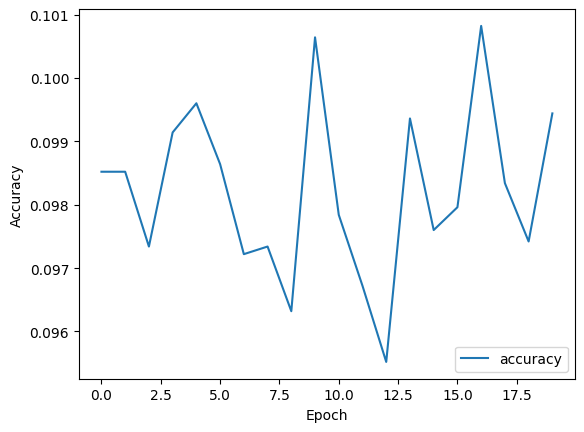

In [31]:
plt.plot(history_image.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

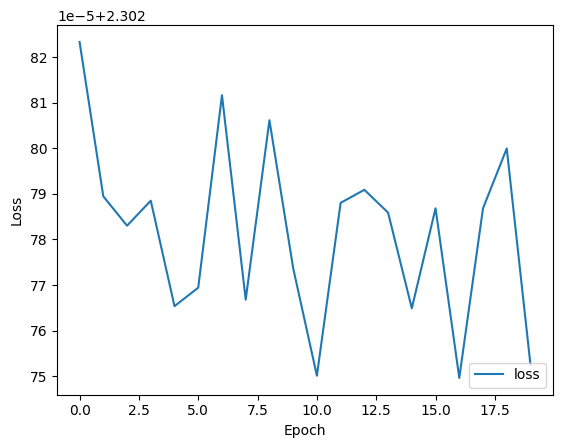

In [32]:
plt.plot(history_image.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

Hasil yang didapatkan mungkin kurang memuaskan jika hanya menggunakan neural network. Oleh karena itu, dalam tugas klasifikasi gambar banyak model yang memanfaatkan `convolutional layer` sebagai tambahan ke dalam modelnya. Convolutional layer berguna untuk melakukan `ekstraksi ciri` pada gambar sebelum akhirnya diklasifikasikan oleh neural network.